all_annotated.csv: 

t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male
FBtr0114258,CR41571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FBtr0346770,CG45784,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FBtr0302440,CR12798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.8026

Import modules:

In [1]:
from scipy.cluster.hierarchy import ward, dendrogram, linkage, leaves_list

from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

Limit the dataset to genes with a median expression across samples of greater than zero.

In [2]:
FPKM1 = pd.read_csv("all_annotated.csv")
FPKM1

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [3]:
FPKM_names = FPKM1.iloc[:, 0:2]
FPKM_names

,t_name,gene_name
0,FBtr0114258,CR41571
1,FBtr0346770,CG45784
2,FBtr0302440,CR12798
3,FBtr0302347,CR40182
4,FBtr0346769,CG45783
...,...,...
34713,FBtr0114187,CR40502
34714,FBtr0304147,CR40719
34715,FBtr0114216,CR40679
34716,FBtr0114222,CR40743


In [4]:
FPKM1.drop(FPKM1.iloc[:, 0:2], inplace = True, axis = 1)
FPKM1

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34715,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591
34716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [5]:
FPKM0 = FPKM1.median(axis=1) != 0
FPKM0

0        False
1        False
2        False
3         True
4        False
         ...  
34713    False
34714    False
34715     True
34716    False
34717    False
Length: 34718, dtype: bool

In [6]:
FPKM = FPKM1.loc[FPKM0]
FPKM

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.202570
8,10.997173,0.000000,0.000000,0.000000,14.805335,0.000000,17.601667,10.729349,0.000000,0.000000,14.888651,14.518989,20.343670,4.087385,0.000000,25.284622
9,19.067924,0.000000,14.832370,27.793905,22.290230,7.846396,13.839143,12.905621,18.570707,2.919183,18.402807,26.431841,27.464781,7.432775,7.349162,22.792486
10,6.315716,3.935390,6.244336,69.942917,67.208557,7.605970,74.979057,53.740307,44.747662,16.834093,52.928318,77.950165,80.805580,31.863932,49.121342,77.608521
11,119.325905,11.631035,120.137291,75.778061,72.815582,123.849213,81.234352,59.657963,48.480839,18.238514,57.343983,86.686310,87.546967,34.522255,53.219402,84.936600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,33.341347,1.056151,9.832860,414.872559,102.529091,25.448748,71.750275,123.175087,119.770973,0.672975,48.309597,71.916695,237.404190,43.700970,75.445251,167.244049
34665,25.209366,0.638430,21.281239,517.077271,326.313934,54.783924,360.265900,222.375244,306.410706,2.153615,200.718567,392.145020,433.656708,21.621773,91.902115,681.475891
34667,2339.313232,34.080185,927.591858,4944.716797,2251.114990,593.744141,2493.088379,1651.994141,2578.825439,76.555481,2175.402344,3736.670654,122.910004,451.278412,692.211304,4556.642090
34684,0.072563,0.000000,0.096390,0.102807,0.000000,0.000000,0.000000,0.126345,0.902268,0.000000,0.000000,0.162814,0.165381,0.000000,0.000000,0.052507


Apply a log2(FPKM + 0.1) transformation to the data.

In [7]:
FPKM_log = np.log2(FPKM + 0.1)
FPKM_log

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
34684,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


In [8]:
FPKM_total = pd.merge(FPKM_names, FPKM_log, left_index=True, right_index=True)
FPKM_total

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
34684,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


Cluster the data matrix for both genes and samples on their patterns of expression (so both the rows and columns of the matrix), and plot a heatmap of the gene expression data.

In [9]:
FPKM_genes = linkage(FPKM_log)
FPKM_genes.shape

(8612, 4)

In [10]:
FPKM_flipped = FPKM_log.T
FPKM_samples = linkage(FPKM_flipped)
FPKM_samples

array([[  2.        ,  10.        , 148.80233244,   2.        ],
       [  0.        ,  16.        , 161.18226856,   3.        ],
       [  8.        ,  17.        , 167.16634436,   4.        ],
       [  4.        ,  12.        , 176.9596102 ,   2.        ],
       [  7.        ,  15.        , 199.06693917,   2.        ],
       [ 14.        ,  20.        , 200.97140687,   3.        ],
       [  3.        ,  18.        , 202.90476829,   5.        ],
       [  6.        ,  21.        , 203.82033862,   4.        ],
       [  9.        ,  22.        , 210.29018269,   6.        ],
       [ 11.        ,  24.        , 210.35348062,   7.        ],
       [ 19.        ,  25.        , 223.87927412,   9.        ],
       [  5.        ,  13.        , 225.02139065,   2.        ],
       [  1.        ,  26.        , 230.93512592,  10.        ],
       [ 27.        ,  28.        , 242.4458862 ,  12.        ],
       [ 23.        ,  29.        , 281.74860023,  16.        ]])

In [11]:
FPKM_flipped.set_axis(FPKM_total['t_name'], axis=1, inplace=True)
FPKM_flipped

t_name,FBtr0302347,FBtr0113885,FBtr0301810,FBtr0113895,FBtr0345179,FBtr0301812,FBtr0113990,FBtr0113989,FBtr0078962,FBtr0078964,...,FBtr0100867,FBtr0100868,FBtr0100870,FBtr0100877,FBtr0100879,FBtr0100884,FBtr0100886,FBtr0100888,FBtr0114261,FBtr0114216
male_10,4.573651,3.472120,4.260622,2.681610,6.899972,2.705093,4.756461,3.146474,-3.321928,3.463929,...,5.821133,6.403850,-3.321928,2.776468,3.492078,5.063561,4.661599,11.191931,-2.534805,1.078063
male_11,3.593093,-3.321928,-3.321928,2.012708,3.552258,-3.321928,-3.321928,-3.321928,-3.321928,4.239056,...,1.281747,2.136340,-3.321928,-1.470133,-1.024012,0.209330,-0.437467,5.095088,-3.321928,-3.321928
male_12,4.383186,-3.321928,3.900371,2.665469,6.909741,3.387643,-3.321928,4.653752,-3.321928,4.670246,...,4.059556,5.462293,-3.321928,3.670053,2.117857,3.312209,4.418274,9.857502,-2.348207,3.016877
male_13,3.772605,-3.321928,4.801878,6.130167,6.245611,4.529754,4.852629,4.093288,-3.321928,4.083719,...,3.609020,10.256761,-3.321928,5.763758,6.549579,8.696872,9.014515,12.271701,-2.301821,1.113834
male_14A,4.240476,3.897757,4.484797,6.072718,6.188155,4.658374,4.892474,2.507524,3.465782,4.078810,...,6.894772,7.994895,5.247958,5.726288,6.448643,6.681296,8.350559,11.136488,-3.321928,1.696735
male_14B,4.749679,-3.321928,2.990301,2.945977,6.953605,4.435483,-3.321928,-3.321928,4.839966,-3.321928,...,6.121077,6.910309,-3.321928,2.676730,4.501407,4.675181,5.778312,9.213941,-3.321928,-3.321928
male_14C,4.518529,4.145813,3.801070,6.230339,6.345793,5.110117,4.421782,-3.321928,6.834119,3.484193,...,7.814423,8.487087,5.119850,5.723819,6.193772,6.166922,8.493319,11.283776,-3.321928,0.695194
male_14D,3.558602,3.436875,3.701063,5.750615,5.901059,4.143877,2.423376,3.733928,7.222319,-3.321928,...,7.521305,7.185842,4.603723,3.962273,5.823686,6.945737,7.797501,10.690080,-2.143405,3.215803
female_10,4.459054,-3.321928,4.222705,5.486961,5.602316,3.885497,4.157226,3.636828,-3.321928,4.533838,...,7.634221,9.376699,2.247168,3.427259,5.372933,6.905339,8.259794,11.332554,0.003268,3.762950
female_11,3.809626,-3.321928,1.594158,4.081859,4.196805,2.035947,-3.321928,-3.321928,-3.321928,3.095164,...,1.140935,3.889324,-3.321928,-0.163229,-1.374355,-0.371506,1.172241,6.260317,-3.321928,0.904145


In [12]:
leaves_list(FPKM_samples)

array([ 6, 14,  7, 15,  5, 13,  1,  4, 12, 11,  9,  3,  8,  0,  2, 10],
      dtype=int32)

In [13]:
leaves_list(FPKM_genes)

array([2710,  480, 3932, ..., 5684, 2530, 4296], dtype=int32)

In [14]:
FPKM_log

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
34684,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


In [15]:
FPKM_samp_ordered = FPKM_log.iloc[:,leaves_list(FPKM_samples)]
FPKM_ordered = FPKM_samp_ordered.iloc[leaves_list(FPKM_genes),:]
FPKM_ordered

,male_14C,female_14C,male_14D,female_14D,male_14B,female_14B,male_11,male_14A,female_14A,female_13,female_11,male_13,female_10,male_10,male_12,female_12
10838,11.627885,-3.321928,6.513012,9.770807,9.915343,10.594618,9.674967,10.186101,9.669459,11.041927,9.911055,10.533361,-3.321928,10.362427,10.730739,9.153596
1771,-3.321928,-3.321928,6.690422,-3.321928,-3.321928,6.329519,4.495864,-3.321928,6.838377,-3.321928,5.681848,6.306998,-3.321928,5.834810,5.910958,5.848470
15545,-3.321928,-3.321928,-3.321928,-3.321928,7.333518,-3.321928,-3.321928,7.029427,6.888902,-3.321928,6.486714,-3.321928,6.008203,6.116518,6.332019,6.112357
1772,11.891232,-3.321928,11.521811,11.715662,11.456581,10.977238,9.584416,11.426619,11.347327,11.210067,9.876014,10.903922,10.592872,10.616585,10.723743,10.790580
14830,-3.321928,4.011398,7.226825,6.482741,4.775450,-3.321928,-3.321928,-3.321928,4.906105,6.536656,5.750684,6.886073,4.165947,5.608112,-3.321928,3.429699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17883,-3.321928,1.510554,-3.321928,-3.321928,0.565386,2.556431,4.215109,3.022511,2.514033,2.975323,4.404787,2.796918,3.743997,3.697081,3.753138,4.144922
23804,-3.321928,1.904281,-3.321928,-3.321928,2.203526,3.742785,4.456723,3.133134,3.082398,3.918539,3.644903,2.515062,4.032783,3.928964,2.938631,4.015114
22645,-3.321928,1.252376,-3.321928,-3.321928,4.190093,5.551469,3.595382,4.846243,5.205921,3.524966,4.244179,4.142772,2.719274,3.654464,5.371957,4.159932
10127,-3.321928,2.108582,-3.321928,-3.321928,4.012782,4.259026,3.734655,3.798314,4.623693,4.782553,4.118265,4.292943,4.214183,3.354926,3.554976,3.861936


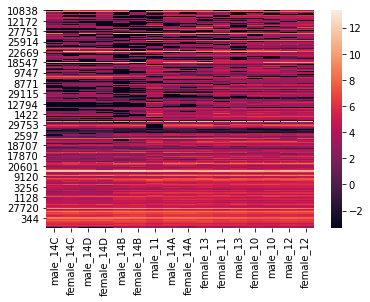

In [16]:
import seaborn as sb
FPKM_map = sb.heatmap(FPKM_ordered)

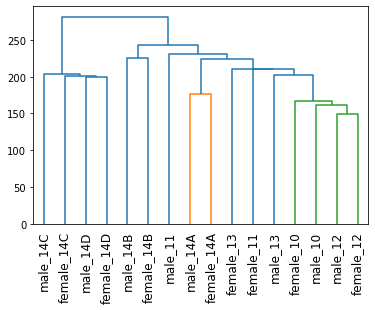

In [17]:
from scipy.cluster.hierarchy import dendrogram

dendrogram(FPKM_samples, labels=FPKM_log.columns, leaf_rotation=90)
plt.show()

In [18]:
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [19]:
FPKM_log

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
34684,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


In [20]:
FPKM_flipped.reset_index(inplace=True)
FPKM_flipped

t_name,index,FBtr0302347,FBtr0113885,FBtr0301810,FBtr0113895,FBtr0345179,FBtr0301812,FBtr0113990,FBtr0113989,FBtr0078962,...,FBtr0100867,FBtr0100868,FBtr0100870,FBtr0100877,FBtr0100879,FBtr0100884,FBtr0100886,FBtr0100888,FBtr0114261,FBtr0114216
0,male_10,4.573651,3.472120,4.260622,2.681610,6.899972,2.705093,4.756461,3.146474,-3.321928,...,5.821133,6.403850,-3.321928,2.776468,3.492078,5.063561,4.661599,11.191931,-2.534805,1.078063
1,male_11,3.593093,-3.321928,-3.321928,2.012708,3.552258,-3.321928,-3.321928,-3.321928,-3.321928,...,1.281747,2.136340,-3.321928,-1.470133,-1.024012,0.209330,-0.437467,5.095088,-3.321928,-3.321928
2,male_12,4.383186,-3.321928,3.900371,2.665469,6.909741,3.387643,-3.321928,4.653752,-3.321928,...,4.059556,5.462293,-3.321928,3.670053,2.117857,3.312209,4.418274,9.857502,-2.348207,3.016877
3,male_13,3.772605,-3.321928,4.801878,6.130167,6.245611,4.529754,4.852629,4.093288,-3.321928,...,3.609020,10.256761,-3.321928,5.763758,6.549579,8.696872,9.014515,12.271701,-2.301821,1.113834
4,male_14A,4.240476,3.897757,4.484797,6.072718,6.188155,4.658374,4.892474,2.507524,3.465782,...,6.894772,7.994895,5.247958,5.726288,6.448643,6.681296,8.350559,11.136488,-3.321928,1.696735
5,male_14B,4.749679,-3.321928,2.990301,2.945977,6.953605,4.435483,-3.321928,-3.321928,4.839966,...,6.121077,6.910309,-3.321928,2.676730,4.501407,4.675181,5.778312,9.213941,-3.321928,-3.321928
6,male_14C,4.518529,4.145813,3.801070,6.230339,6.345793,5.110117,4.421782,-3.321928,6.834119,...,7.814423,8.487087,5.119850,5.723819,6.193772,6.166922,8.493319,11.283776,-3.321928,0.695194
7,male_14D,3.558602,3.436875,3.701063,5.750615,5.901059,4.143877,2.423376,3.733928,7.222319,...,7.521305,7.185842,4.603723,3.962273,5.823686,6.945737,7.797501,10.690080,-2.143405,3.215803
8,female_10,4.459054,-3.321928,4.222705,5.486961,5.602316,3.885497,4.157226,3.636828,-3.321928,...,7.634221,9.376699,2.247168,3.427259,5.372933,6.905339,8.259794,11.332554,0.003268,3.762950
9,female_11,3.809626,-3.321928,1.594158,4.081859,4.196805,2.035947,-3.321928,-3.321928,-3.321928,...,1.140935,3.889324,-3.321928,-0.163229,-1.374355,-0.371506,1.172241,6.260317,-3.321928,0.904145


In [21]:
FPKM_flipped['index'].str.split('_', expand=True)

,0,1
0,male,10
1,male,11
2,male,12
3,male,13
4,male,14A
5,male,14B
6,male,14C
7,male,14D
8,female,10
9,female,11


In [22]:
FPKM_flipped[['sex', 'stage']] = FPKM_flipped['index'].str.split('_', expand=True)
FPKM_flipped

t_name,index,FBtr0302347,FBtr0113885,FBtr0301810,FBtr0113895,FBtr0345179,FBtr0301812,FBtr0113990,FBtr0113989,FBtr0078962,...,FBtr0100870,FBtr0100877,FBtr0100879,FBtr0100884,FBtr0100886,FBtr0100888,FBtr0114261,FBtr0114216,sex,stage
0,male_10,4.573651,3.472120,4.260622,2.681610,6.899972,2.705093,4.756461,3.146474,-3.321928,...,-3.321928,2.776468,3.492078,5.063561,4.661599,11.191931,-2.534805,1.078063,male,10
1,male_11,3.593093,-3.321928,-3.321928,2.012708,3.552258,-3.321928,-3.321928,-3.321928,-3.321928,...,-3.321928,-1.470133,-1.024012,0.209330,-0.437467,5.095088,-3.321928,-3.321928,male,11
2,male_12,4.383186,-3.321928,3.900371,2.665469,6.909741,3.387643,-3.321928,4.653752,-3.321928,...,-3.321928,3.670053,2.117857,3.312209,4.418274,9.857502,-2.348207,3.016877,male,12
3,male_13,3.772605,-3.321928,4.801878,6.130167,6.245611,4.529754,4.852629,4.093288,-3.321928,...,-3.321928,5.763758,6.549579,8.696872,9.014515,12.271701,-2.301821,1.113834,male,13
4,male_14A,4.240476,3.897757,4.484797,6.072718,6.188155,4.658374,4.892474,2.507524,3.465782,...,5.247958,5.726288,6.448643,6.681296,8.350559,11.136488,-3.321928,1.696735,male,14A
5,male_14B,4.749679,-3.321928,2.990301,2.945977,6.953605,4.435483,-3.321928,-3.321928,4.839966,...,-3.321928,2.676730,4.501407,4.675181,5.778312,9.213941,-3.321928,-3.321928,male,14B
6,male_14C,4.518529,4.145813,3.801070,6.230339,6.345793,5.110117,4.421782,-3.321928,6.834119,...,5.119850,5.723819,6.193772,6.166922,8.493319,11.283776,-3.321928,0.695194,male,14C
7,male_14D,3.558602,3.436875,3.701063,5.750615,5.901059,4.143877,2.423376,3.733928,7.222319,...,4.603723,3.962273,5.823686,6.945737,7.797501,10.690080,-2.143405,3.215803,male,14D
8,female_10,4.459054,-3.321928,4.222705,5.486961,5.602316,3.885497,4.157226,3.636828,-3.321928,...,2.247168,3.427259,5.372933,6.905339,8.259794,11.332554,0.003268,3.762950,female,10
9,female_11,3.809626,-3.321928,1.594158,4.081859,4.196805,2.035947,-3.321928,-3.321928,-3.321928,...,-3.321928,-0.163229,-1.374355,-0.371506,1.172241,6.260317,-3.321928,0.904145,female,11


In [23]:
FPKM_flipped['stage'] = FPKM_flipped['stage'].replace(['14A','14B','14C', '14D'], '14')
FPKM_flipped['stage'] = FPKM_flipped['stage'].astype(str).astype(int)
FPKM_flipped

t_name,index,FBtr0302347,FBtr0113885,FBtr0301810,FBtr0113895,FBtr0345179,FBtr0301812,FBtr0113990,FBtr0113989,FBtr0078962,...,FBtr0100870,FBtr0100877,FBtr0100879,FBtr0100884,FBtr0100886,FBtr0100888,FBtr0114261,FBtr0114216,sex,stage
0,male_10,4.573651,3.472120,4.260622,2.681610,6.899972,2.705093,4.756461,3.146474,-3.321928,...,-3.321928,2.776468,3.492078,5.063561,4.661599,11.191931,-2.534805,1.078063,male,10
1,male_11,3.593093,-3.321928,-3.321928,2.012708,3.552258,-3.321928,-3.321928,-3.321928,-3.321928,...,-3.321928,-1.470133,-1.024012,0.209330,-0.437467,5.095088,-3.321928,-3.321928,male,11
2,male_12,4.383186,-3.321928,3.900371,2.665469,6.909741,3.387643,-3.321928,4.653752,-3.321928,...,-3.321928,3.670053,2.117857,3.312209,4.418274,9.857502,-2.348207,3.016877,male,12
3,male_13,3.772605,-3.321928,4.801878,6.130167,6.245611,4.529754,4.852629,4.093288,-3.321928,...,-3.321928,5.763758,6.549579,8.696872,9.014515,12.271701,-2.301821,1.113834,male,13
4,male_14A,4.240476,3.897757,4.484797,6.072718,6.188155,4.658374,4.892474,2.507524,3.465782,...,5.247958,5.726288,6.448643,6.681296,8.350559,11.136488,-3.321928,1.696735,male,14
5,male_14B,4.749679,-3.321928,2.990301,2.945977,6.953605,4.435483,-3.321928,-3.321928,4.839966,...,-3.321928,2.676730,4.501407,4.675181,5.778312,9.213941,-3.321928,-3.321928,male,14
6,male_14C,4.518529,4.145813,3.801070,6.230339,6.345793,5.110117,4.421782,-3.321928,6.834119,...,5.119850,5.723819,6.193772,6.166922,8.493319,11.283776,-3.321928,0.695194,male,14
7,male_14D,3.558602,3.436875,3.701063,5.750615,5.901059,4.143877,2.423376,3.733928,7.222319,...,4.603723,3.962273,5.823686,6.945737,7.797501,10.690080,-2.143405,3.215803,male,14
8,female_10,4.459054,-3.321928,4.222705,5.486961,5.602316,3.885497,4.157226,3.636828,-3.321928,...,2.247168,3.427259,5.372933,6.905339,8.259794,11.332554,0.003268,3.762950,female,10
9,female_11,3.809626,-3.321928,1.594158,4.081859,4.196805,2.035947,-3.321928,-3.321928,-3.321928,...,-3.321928,-0.163229,-1.374355,-0.371506,1.172241,6.260317,-3.321928,0.904145,female,11


In [24]:
FPKM_x = smf.ols(formula = "FBtr0302347 ~ stage", data = FPKM_flipped)
results = FPKM_x.fit()
results.summary()

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            FBtr0302347   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.062
Method:                 Least Squares   F-statistic:                    0.1184
Date:                Wed, 08 Dec 2021   Prob (F-statistic):              0.736
Time:                        14:25:24   Log-Likelihood:                -9.0357
No. Observations:                  16   AIC:                             22.07
Df Residuals:                      14   BIC:                             23.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8414      0.987      3.891      0.002       1.724       5.959
stage          0.0265      0.077      0.344      0.736      -0.138       0.191
==============================================================================
Omnibus:                        2.115   Durbin-Watson:                   2.604
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.005
Skew:                           0.102   Prob(JB):                        0.605
Kurtosis:                       1.789   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

need to create new temp dataframe with stage and fpmk gene and interate through that

Want to create "plot" of FPKM expression level vs. stage (x axis) for each gene and deduce the p value of the line trend. If p is significant it means slope of trend line is >0 and significant

In [25]:
FPKM_x = smf.ols(formula = "stage ~ FBtr0302347", data = FPKM_flipped)
results = FPKM_x.fit()
results.summary()

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stage   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.062
Method:                 Least Squares   F-statistic:                    0.1184
Date:                Wed, 08 Dec 2021   Prob (F-statistic):              0.736
Time:                        14:25:24   Log-Likelihood:                -28.898
No. Observations:                  16   AIC:                             61.80
Df Residuals:                      14   BIC:                             63.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.4258      3.869      2.954      0.010       3.129      19.723
FBtr0302347     0.3169      0.921      0.344      0.736      -1.658       2.292
==============================================================================
Omnibus:                        2.780   Durbin-Watson:                   0.775
Prob(Omnibus):                  0.249   Jarque-Bera (JB):                2.145
Skew:                          -0.802   Prob(JB):                        0.342
Kurtosis:                       2.197   Cond. No.                         43.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
p_vals = []
for FB in FPKM_flipped.iloc[:,1:-2]:
    F = FB + " ~ stage"
    FPKM_x = smf.ols(formula = F, data = FPKM_flipped)
    results = FPKM_x.fit()
    p_vals.append(results.pvalues[1])
print(len(p_vals))

8613


In [27]:
import numpy as np
p_exp = []
p_list = range(1, 8614)
for i in p_list:
    p_exp.append(i/8613) 
p_exp_log = -np.log10(p_exp)
print(p_exp_log)

[ 3.93515445e+00  3.63412445e+00  3.45803319e+00 ...  1.00857985e-04
  5.04260647e-05 -0.00000000e+00]


In [31]:
p_vals_sort = p_vals.copy()
p_vals_sort.sort(reverse=False)
p_vals_log = -np.log10(p_vals_sort)
p_vals_log

array([1.40829923e+01, 1.40829923e+01, 1.38373457e+01, ...,
       3.86099721e-04, 2.01581906e-04, 1.59066335e-05])

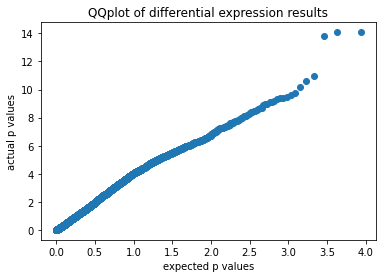

In [32]:
import matplotlib.pyplot as plt
plt.scatter(p_exp_log, p_vals_log)
plt.xlabel("expected p values")
plt.ylabel("actual p values")
plt.title("QQplot of differential expression results")
plt.show()

Report the list of genes that exhibit differential expression by stage at a 10% false discovery rate. <br>
False discovery rate = 10% chance that something that comes up as significant is a false positive; 90% it's true

In [36]:
import statsmodels.stats
fdr_10 = statsmodels.stats.multitest.fdrcorrection(p_vals, alpha=0.10)
fdr_10[0]

array([False, False, False, ..., False, False, False])

Use statsmodels to get false discovery rate "Trues", take pandas df with gene names (8313 length) and take out ones with "true", take column names

In [39]:
list_of_genes = FPKM_flipped.iloc[:,1:-2].loc[:,fdr_10[0]].columns
list_of_genes

Index(['FBtr0113895', 'FBtr0301812', 'FBtr0078962', 'FBtr0078985',
       'FBtr0078967', 'FBtr0078958', 'FBtr0078955', 'FBtr0078951',
       'FBtr0078914', 'FBtr0078915',
       ...
       'FBtr0089076', 'FBtr0089091', 'FBtr0089242', 'FBtr0089222',
       'FBtr0089221', 'FBtr0100861', 'FBtr0100864', 'FBtr0100866',
       'FBtr0100870', 'FBtr0100879'],
      dtype='object', name='t_name', length=3790)

If sex has an impact on gene expression, you want to remove that. 
See effect of sex while removing effect on gene expression <br>

Repeat the analysis while controlling for sex. <br>

Report the list of genes that exhibit differential expression by stage at a 10% false discovery rate while controlling for sex.

In [64]:
p_vals_sex = []
beta = []
for FB in FPKM_flipped.iloc[:,1:-2]:
    F = FB + " ~ stage + sex"
    FPKM_x = smf.ols(formula = F, data = FPKM_flipped)
    results = FPKM_x.fit()
    p_vals_sex.append(results.pvalues[2])
    beta.append(results.params[2])

import statsmodels.stats
fdr_10_sex = statsmodels.stats.multitest.fdrcorrection(p_vals_sex, alpha=0.10)
fdr_10_sex[0]

list_of_genes_sex = FPKM_flipped.iloc[:,1:-2].loc[:,fdr_10_sex[0]].columns
list_of_genes_sex

Index(['FBtr0113895', 'FBtr0301812', 'FBtr0078962', 'FBtr0078985',
       'FBtr0078967', 'FBtr0078958', 'FBtr0078955', 'FBtr0078951',
       'FBtr0078914', 'FBtr0078915',
       ...
       'FBtr0089076', 'FBtr0089091', 'FBtr0089242', 'FBtr0089222',
       'FBtr0089221', 'FBtr0100861', 'FBtr0100864', 'FBtr0100866',
       'FBtr0100870', 'FBtr0100879'],
      dtype='object', name='t_name', length=3667)

Compare the lists–what is the percentage overlap with and without sex as a covariate?

In [45]:
results.pvalues

Intercept      0.498038
sex[T.male]    0.272503
stage          0.749759
dtype: float64

In [54]:
overlap = 1- ((len(list_of_genes) - len(list_of_genes_sex))/len(list_of_genes))
overlap

0.9675461741424802

Generate a volcano plot of the differential expression, with sex as a covariate, results ( -log10(p-value) on the y-axis, beta on the x axis). Color the significant points in a different color. <br>
beta = slope

In [66]:
p_vals_sex_log10 = -np.log10(p_vals_sex)
p_vals_sex_log10

array([0.12756472, 0.75699405, 0.56205398, ..., 0.25150043, 0.74983917,
       0.1250782 ])

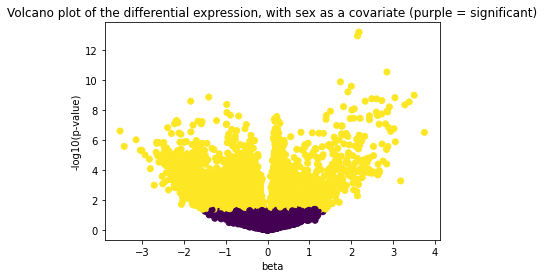

In [72]:
plt.scatter(beta, p_vals_sex_log10, c=fdr_10_sex[0])
plt.xlabel("beta")
plt.ylabel("-log10(p-value)")
plt.title("Volcano plot of the differential expression, with sex as a covariate (purple = significant)")
plt.show()
